In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Tổng quan dữ liệu:

- Hãy đọc file CSV và hiển thị 5 dòng đầu tiên.

- Kiểm tra có bao nhiêu dòng và cột trong dataset.

In [2]:
df = pd.read_csv('data/data_analysis_practice.csv')
df.head()

,Student_ID,Name,Midterm_Score,Final_Score,Attendance,Assignment_Score
0,SV001,Student 1,77.450712,58.015551,71,61
1,SV002,Student 2,67.926035,69.952256,95,50
2,SV003,Student 3,79.715328,70.887426,86,50
3,SV004,Student 4,92.845448,65.372673,77,96
4,SV005,Student 5,66.487699,73.064571,70,83


In [3]:
df.shape

(100, 6)

## 2. Thống kê mô tả:

- Tính giá trị trung bình, độ lệch chuẩn, giá trị lớn nhất và nhỏ nhất của điểm thi giữa kỳ và cuối kỳ.

- Kiểm tra có giá trị nào bị thiếu không?

In [4]:
df['Midterm_Score'].describe()

count    100.000000
mean      68.442302
std       13.622526
min       30.703823
25%       60.986415
50%       68.095656
75%       76.089281
max       97.784173
Name: Midterm_Score, dtype: float64

In [5]:
df['Final_Score'].describe()

count    100.000000
mean      75.132791
std       11.108216
min       51.974745
25%       65.332074
50%       76.009286
75%       81.458045
max      100.000000
Name: Final_Score, dtype: float64

In [9]:
print(df['Final_Score'].empty)
print(df['Midterm_Score'].empty)

False
False


## 3. Phân tích dữ liệu:

- Có bao nhiêu sinh viên đạt điểm giữa kỳ trên 85?

- Tính điểm tổng kết trung bình của toàn bộ sinh viên, biết rằng:

- Final Grade = 0.4 × Midterm Score + 0.5 × Final Score + 0.1 × Assignment Score

- Tìm sinh viên có điểm tổng kết cao nhất và thấp nhất.

In [11]:
df[df['Midterm_Score'] > 85]['Midterm_Score'].count()

np.int64(11)

In [12]:
df['Final_Grade'] = 0.4 * df['Midterm_Score'] + 0.5 * df['Final_Score'] + 0.1 * df['Assignment_Score']

In [14]:
print(df[df['Final_Grade'] == df['Final_Grade'].max()])
print(df[df['Final_Grade'] == df['Final_Grade'].min()])

  Student_ID       Name  Midterm_Score  Final_Score  Attendance  \
6      SV007  Student 7      93.688192    97.634231          80   

   Assignment_Score  Final_Grade  
6                97    95.992392  
   Student_ID        Name  Midterm_Score  Final_Score  Attendance  \
10      SV011  Student 11      63.048735    51.974745          98   

    Assignment_Score  Final_Grade  
10                50    56.206867  


## 4. Trực quan hóa dữ liệu:

- Vẽ histogram của điểm giữa kỳ và cuối kỳ.

- Vẽ biểu đồ scatter giữa điểm giữa kỳ và điểm cuối kỳ để xem mối quan hệ giữa chúng.

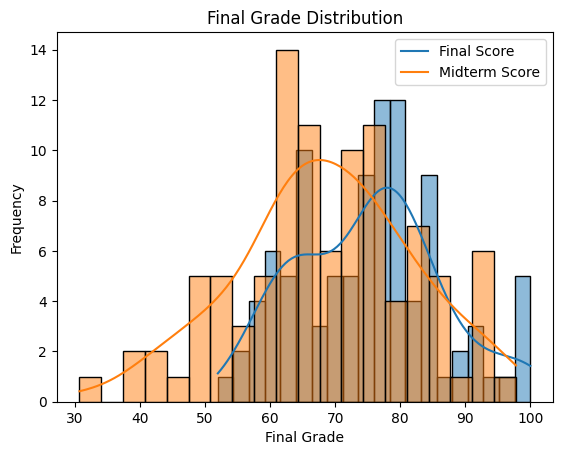

In [18]:
sns.histplot(df['Final_Score'], bins=20, kde=True)
sns.histplot(df['Midterm_Score'], bins=20, kde=True)
plt.title('Final Grade Distribution')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.legend(['Final Score', 'Midterm Score'])
plt.show()

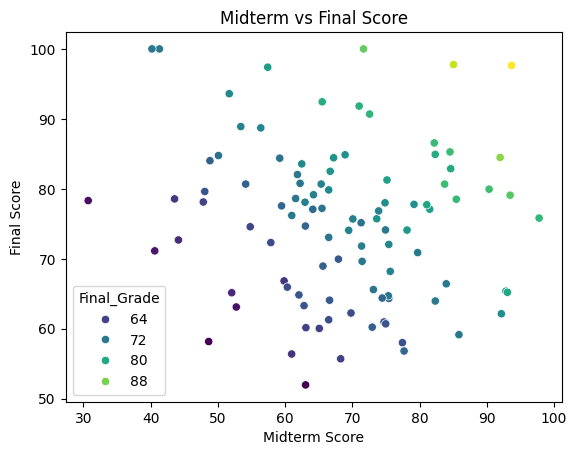

In [23]:
sns.scatterplot(x='Midterm_Score', y='Final_Score', data=df, palette='viridis', hue='Final_Grade')
plt.title('Midterm vs Final Score')
plt.xlabel('Midterm Score')
plt.ylabel('Final Score')
plt.show()